In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 


In [2]:
exo_df = pd.read_csv("./data/Exoplanet_catalog_2019.csv")
exo_df.rename(columns={'# name':'name'}, inplace=True)
planet_df = exo_df[['name', 'orbital_period', 'semi_major_axis', 'detection_type', 'star_mass']].dropna()


# Analysing dataframes

```{admonition} Questions
:class: questions
- How do you plot the data in a dataframe?
- How do you operate on columns?
- How do you add new data?
```

```{admonition} Objectives
:class: objectives
- Create some histograms of the exoplanet data
- Add new columns to the dataframe
- Confirm Kepler's 3rd law
```

In this section we'll be analysing the data in the cleaned `planet_df` dataframe.

If you haven't already, set up a dataframe called `planet_df` that contains the five columns described in the [previous section](02_cleaning_data.ipynb) with rows with missing data removed.

In [61]:
planet_df

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.03000,1.2900,Radial Velocity,2.70
1,11 UMi b,516.22000,1.5400,Radial Velocity,1.80
2,14 And b,185.84000,0.8300,Radial Velocity,2.20
3,14 Her b,1773.40000,2.7700,Radial Velocity,0.90
4,16 Cyg B b,799.50000,1.6800,Radial Velocity,1.01
...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,Radial Velocity,2.30
3828,ups And b,4.61711,0.0590,Radial Velocity,1.27
3829,ups And c,240.93700,0.8610,Radial Velocity,1.27
3830,ups And d,1281.43900,2.5500,Radial Velocity,1.27


## Making quick plots


First let's make some histograms. Everyone loves a histogram! 

`pandas` works well with `matplotlib`, so we can make a histogram quite easily. To make a histogram of orbital periods we can just use

<AxesSubplot: >

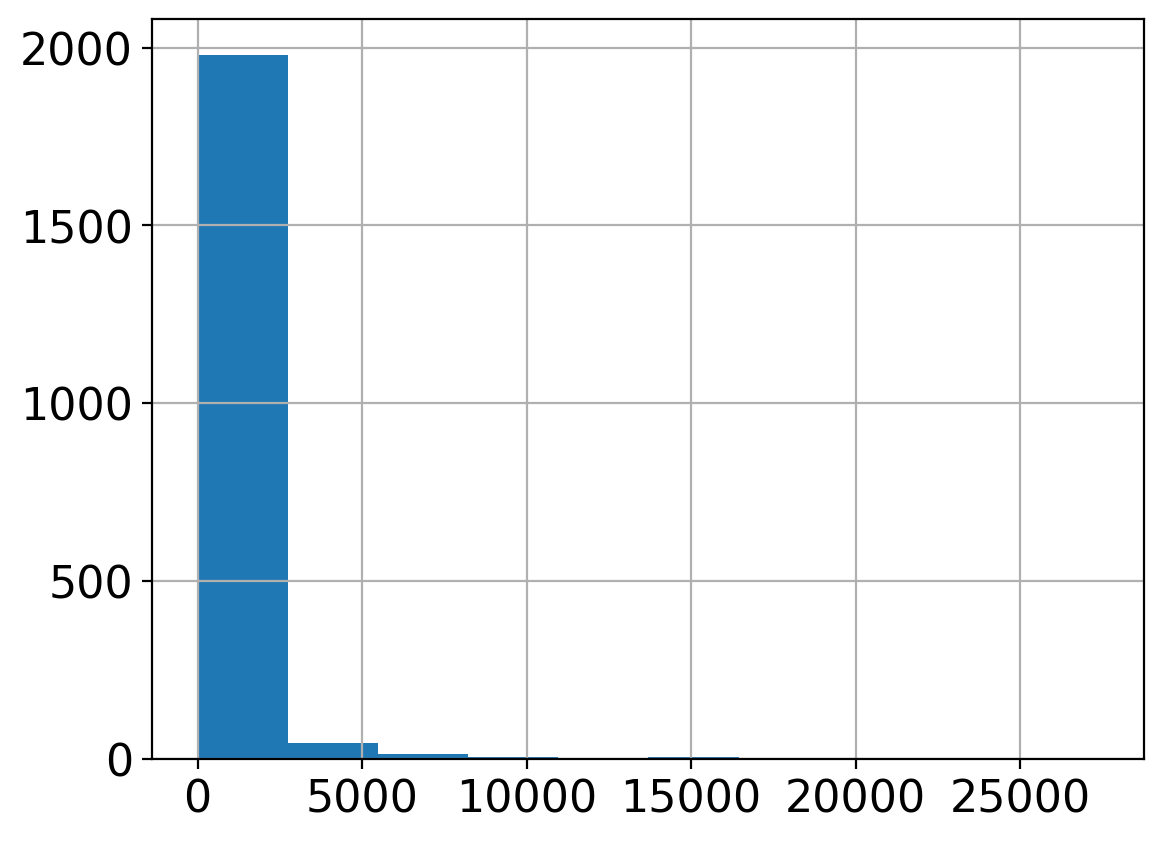

In [62]:
planet_df['orbital_period'].hist()

Using the `hist` function built into dataframes is good for getting a quick look at our data, but it's not particularly pretty. `matplotlib` made much nicer plots. We can make a histogram of the periods in the same way we would with a normal variable; this time we just pass it the dataframe column we're interested in.

````{admonition} Exercise: Remember to load matplotlib.pyplot
:class: practice

If you haven't already, you'll need to load the `matplotlib.pyplot` package to make your plots. 

In the cell right at the top of your notebook, add 
```py
import matplotlib.pyplot as plt
```
and re-run that cell. 

If the first cell of your notebook doesn't contain the imports, you can add a new cell above the first one:
1. Click on the cell at the top of your notebook
2. Press the Escape key (`Esc`), then press the `a` key. **Don't press them at the same time**, it should be `Esc` **then** `a`. This adds a cell above the one you'd selected. 

If you want to add a new cell below your current cell, you'd press `Esc` then `b`
````


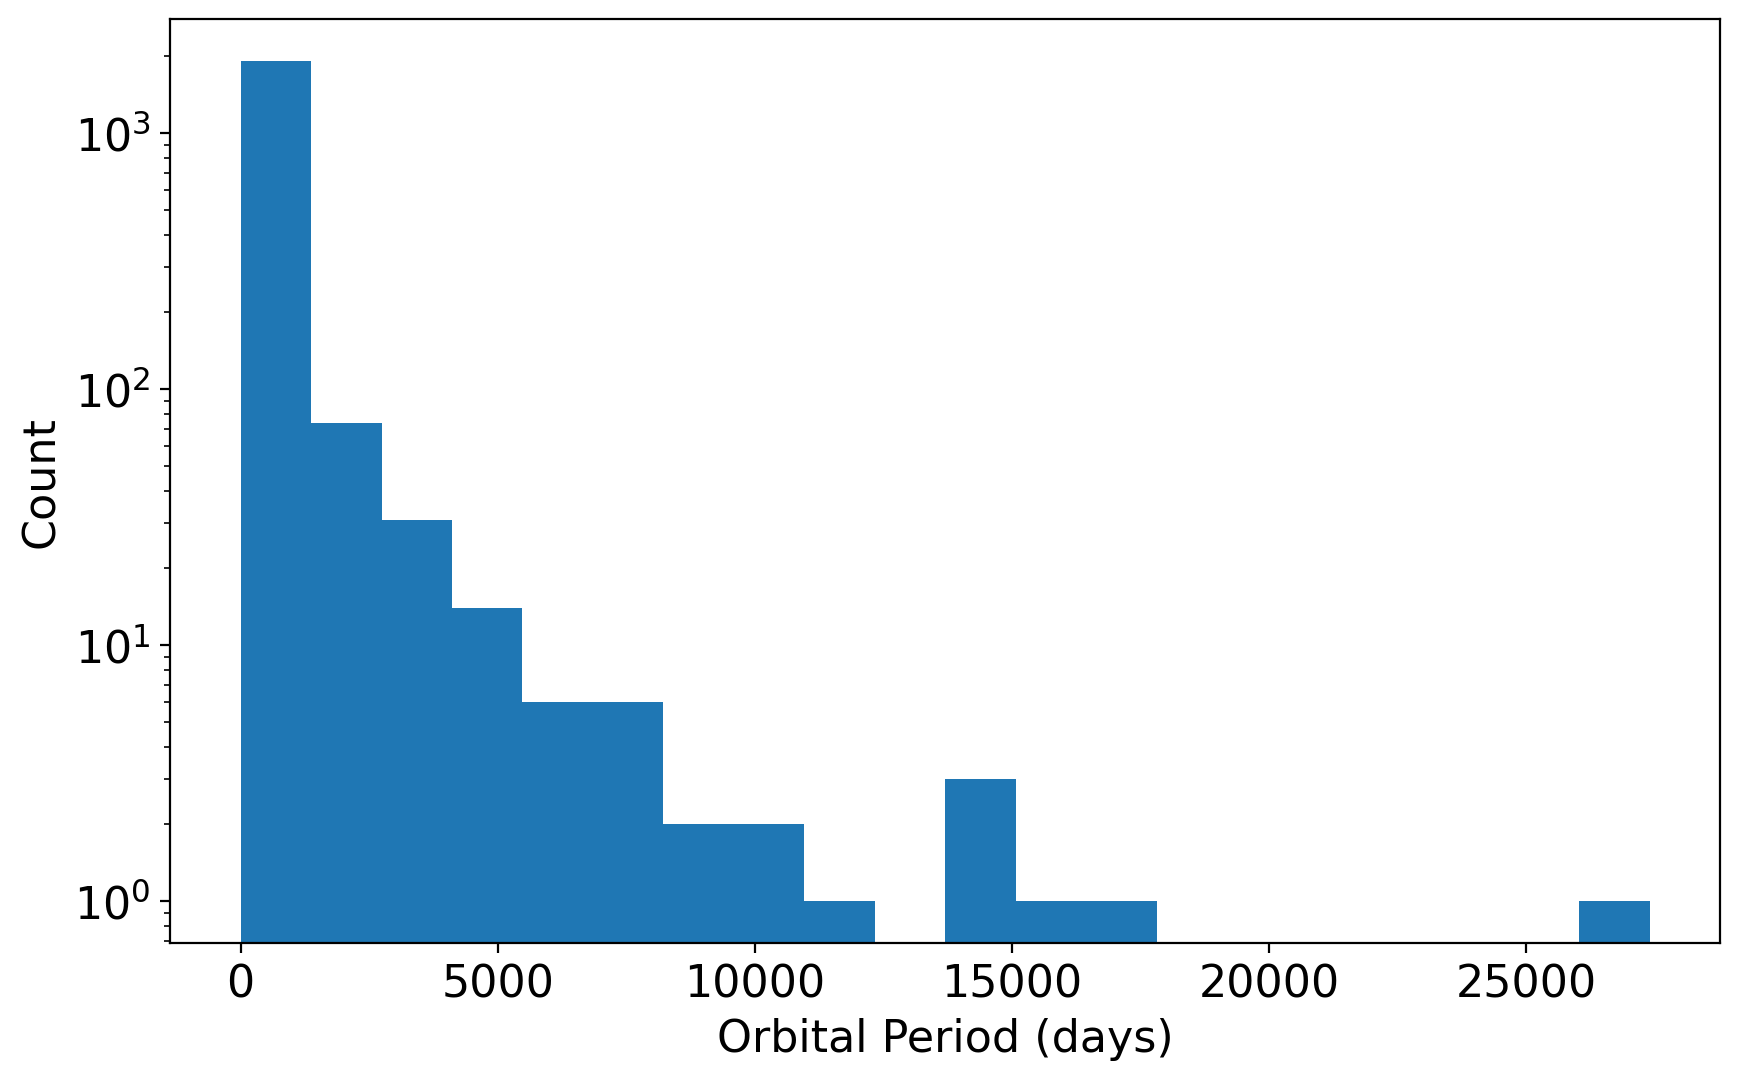

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'], bins=20)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
plt.show()

## Selecting and comparing datasets
The `detection_type` column in our data tells us the technique that was used to detect the planet. There are two different detection techniques used in this data set: `Radial Velocity` and `Primary Transit`. 

In order to compare the results from the two methods, we're going to make two histograms. 

We'll use a logical expression on one column 
```py
planet_df['detection_type']=='Radial Velocity'
```
to determine which rows of another column we want to select.


There are two ways we can use this to select the data. The first is similar to what we did in the [Conditional Selection](cond-sel) section in the first part of this notebook:



In [3]:
planet_df[planet_df['detection_type']=='Radial Velocity']['orbital_period']

0        326.03000
1        516.22000
2        185.84000
3       1773.40000
4        799.50000
           ...    
3827     305.50000
3828       4.61711
3829     240.93700
3830    1281.43900
3831    3848.86000
Name: orbital_period, Length: 782, dtype: float64

In the cell above, we've selected all the rows where the `detection_type` is `Radial Velocity` in the same way as we did in the [Conditional Selection](cond-sel) section, then we've selected the `orbital_period`. 

The other way we can do this is using the `where` function built into `pandas`. This does the same selection as above but the output is slightly different. 

In [15]:
planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity')

0        326.03000
1        516.22000
2        185.84000
3       1773.40000
4        799.50000
           ...    
3827     305.50000
3828       4.61711
3829     240.93700
3830    1281.43900
3831    3848.86000
Name: orbital_period, Length: 2049, dtype: float64

Look at the length of the output in both cases. For the first one, it's returned 782 rows - it's only returned the rows that match the conditional selection. When we used `where()` it's returned 2049 rows. In this case it returns all the rows but will fill `NaN`s into the rows that don't match the selection. You can see this more clearly by missing out the column selection and using `head(20)` to look at the first 20 rows again:


**Using `where()`**

In [ ]:
planet_df.where(planet_df['detection_type']=='Radial Velocity').head(20)

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.03000,1.29000,Radial Velocity,2.700
1,11 UMi b,516.22000,1.54000,Radial Velocity,1.800
2,14 And b,185.84000,0.83000,Radial Velocity,2.200
3,14 Her b,1773.40000,2.77000,Radial Velocity,0.900
4,16 Cyg B b,799.50000,1.68000,Radial Velocity,1.010
5,18 Del b,993.30000,2.60000,Radial Velocity,2.300
6,NaN,NaN,NaN,NaN,NaN
7,24 Boo b,30.35060,0.19000,Radial Velocity,0.990
8,24 Sex b,452.80000,1.33300,Radial Velocity,1.540
9,24 Sex c,883.00000,2.08000,Radial Velocity,1.540


**Not using `where()`**

In [20]:
planet_df[planet_df['detection_type']=='Radial Velocity'].head(20)

,name,orbital_period,semi_major_axis,detection_type,star_mass
0,11 Com b,326.03000,1.29000,Radial Velocity,2.700
1,11 UMi b,516.22000,1.54000,Radial Velocity,1.800
2,14 And b,185.84000,0.83000,Radial Velocity,2.200
3,14 Her b,1773.40000,2.77000,Radial Velocity,0.900
4,16 Cyg B b,799.50000,1.68000,Radial Velocity,1.010
5,18 Del b,993.30000,2.60000,Radial Velocity,2.300
7,24 Boo b,30.35060,0.19000,Radial Velocity,0.990
8,24 Sex b,452.80000,1.33300,Radial Velocity,1.540
9,24 Sex c,883.00000,2.08000,Radial Velocity,1.540
10,30 Ari B b,335.10000,0.99500,Radial Velocity,1.220


## Comparing data with plots
Now we can make two histograms to compare the period distribtions from the different techniques.

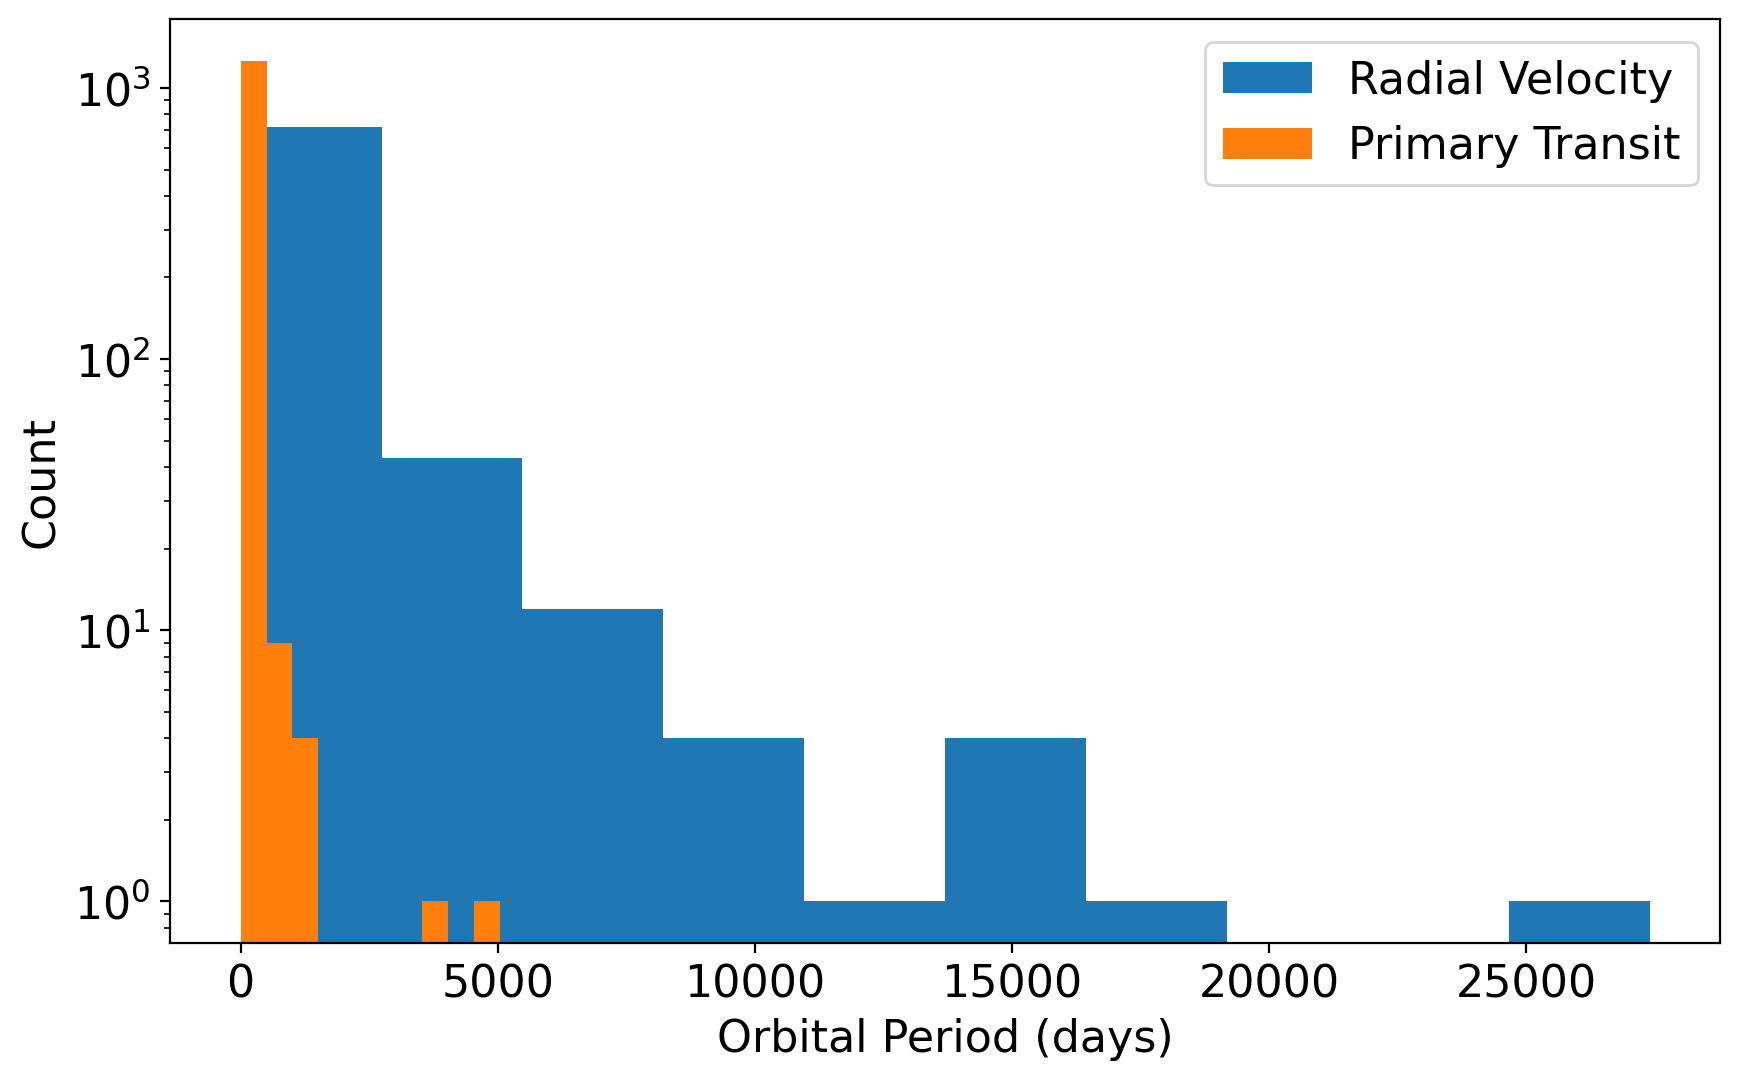

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), label='Radial Velocity')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), label='Primary Transit')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

This is sort of OK, but notice the width of the bins in the orange histogram compared to the blue histogram. We've used 20 bins for each set of data, but the period range for the transit data looks to be much smaller than for the radial velocity data. 

To do a meaningful comparison we should make sure the histogram bins are the same for the two plots. 

We can check the minimum and maxmimum values of the period using the `min()` and `max()` functions

In [22]:
planet_df['orbital_period'].min()


0.07943002

In [23]:
planet_df['orbital_period'].max()

27400.0

A (very) approximate guideline is the number of bins in a histogram is roughly $\sqrt{N}$. We can check how many objects we have in each dataset using `len()`, then use that to get an estimate of the number of bins needed. 

In [24]:
n_rad_vel = len(planet_df[planet_df['detection_type']=='Radial Velocity'])
sqrt_rad_vel = np.sqrt(n_rad_vel)
print(f'Radial velocity: n = {n_rad_vel}, sqrt = {sqrt_rad_vel:.2f}')

Radial velocity: n = 782, sqrt = 27.96


In [25]:
n_transit = len(planet_df[planet_df['detection_type']=='Primary Transit'])
sqrt_transit = np.sqrt(n_transit)
print(f'Primary transit: n = {n_transit}, sqrt = {sqrt_transit:.2f}')

Primary transit: n = 1267, sqrt = 35.59


As $\sqrt{N_{RV}} \sim 28$ and $\sqrt{N_{T}} \sim 36$, I'm going to pick something in the middle and use 30 bins. I'll make an array for my bin edges that goes from 0 to the maxmimum value and has `nbins+1` elements. Then I can use that for the `bins` parameter in `plt.hist`.

`````{admonition} Exercise: **np.linspace** and **np.arange**
:class: practice

In previous sessions we've been using `np.arange` to get a list of numbers. An alternative function is `np.linspace`. Try out the following commands

```python
np.linspace(0,100,5)
```
and
```python
np.arange(0,100,5)
```
to see the difference. Write some notes in a markdown cell that explain the difference between the two functions.
`````

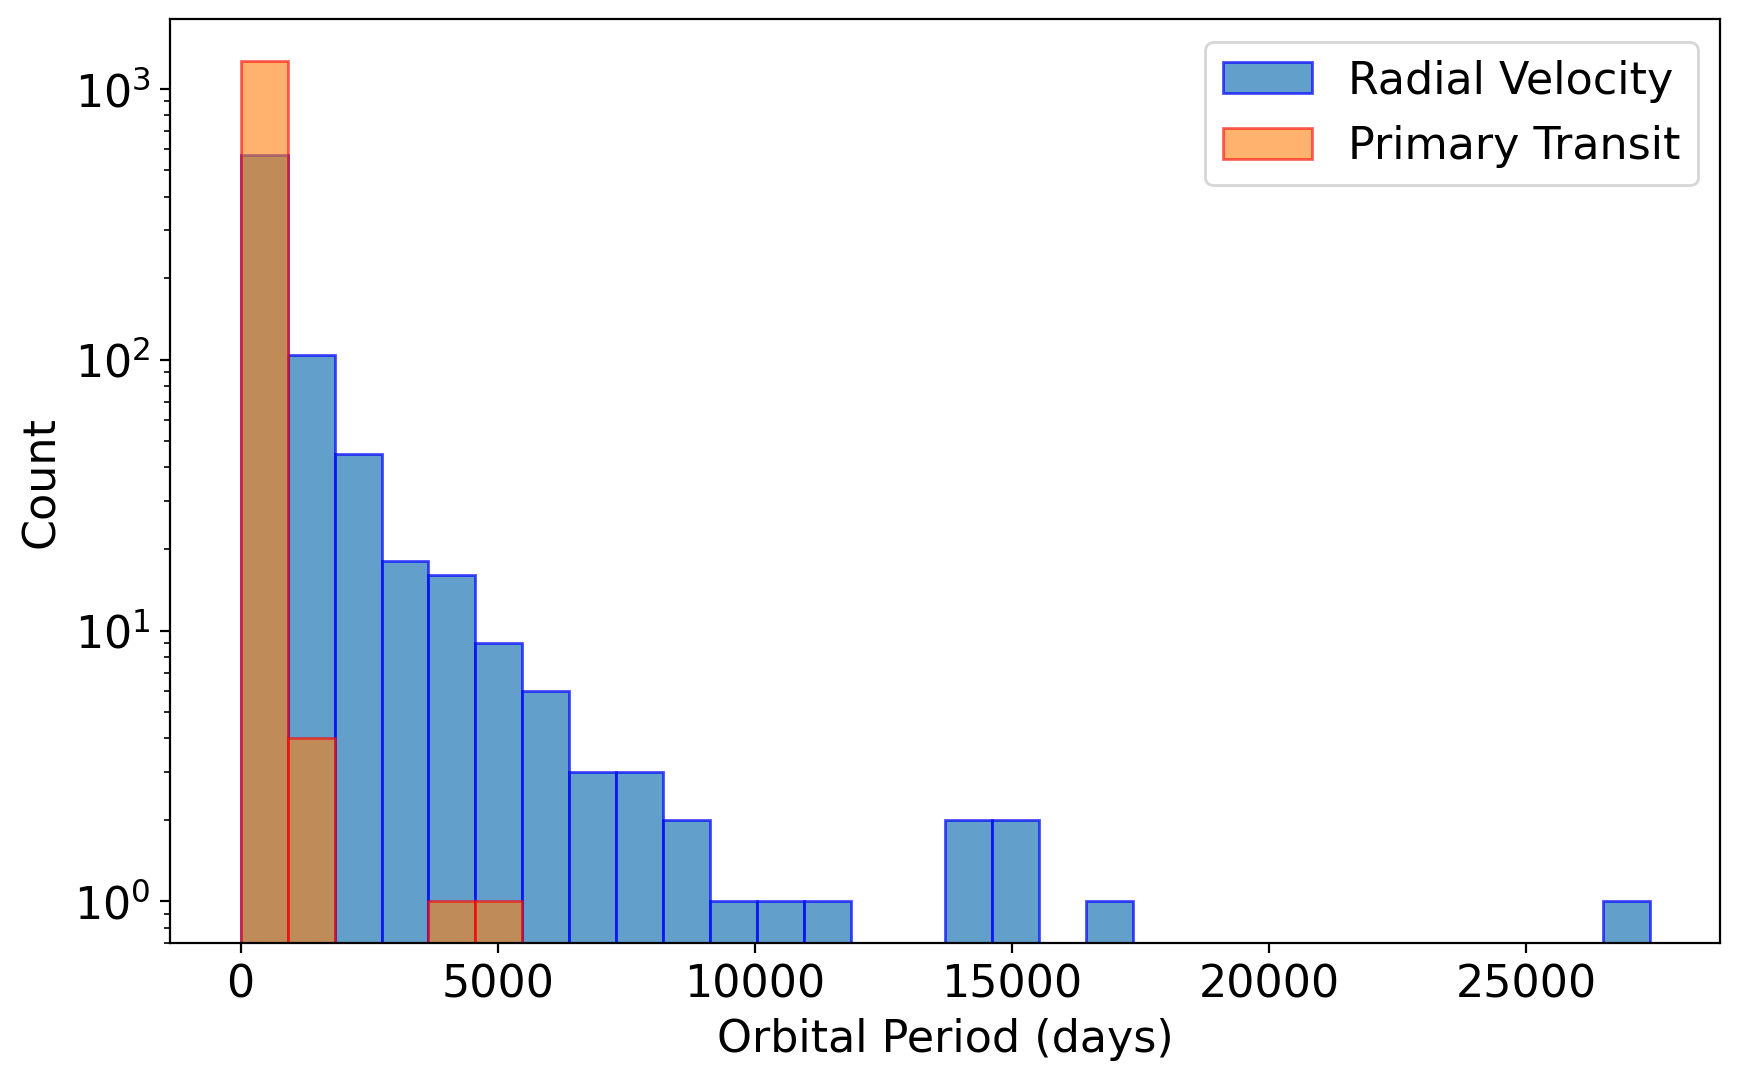

In [26]:
bins = np.linspace(0,planet_df['orbital_period'].max(), 31)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Radial Velocity'), bins=bins, label='Radial Velocity', alpha=0.7, edgecolor='blue')
ax.hist(planet_df['orbital_period'].where(planet_df['detection_type']=='Primary Transit'), bins=bins, label='Primary Transit', alpha=0.6, edgecolor='red')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Count')
ax.set_yscale('log') ## set the y-axis to log scale so we can see the details
ax.legend()
plt.show()

With the bins having the same width for each dataset we can be confident that there really are more planets in the first bin that were detected with the transit technique than for the radial velocity technique.

The other change I made to this plot was to make the bars semi-transparent. When you plot multiple datasets on the same plot with `matplotlib` it plots them in the order you write.  This means that the second dataset is plotted over the top of the first. However, that means that some data will be hidden on the plot. If we didn't change the transparency we wouldn't be able to see how many radial velocity detections were in the first bin; all we'd know was that there must be less than (or equal to) the number of transit detections. 

The transparency is controlled by the `alpha` argument in the plotting function, where `alpha=1` corresponds to completely opaque (the default value) and `alpha=0` is completely transparent. You can play around with these values to until you have something that looks right. 

Remember, the point of plots is to **tell a convincing story that supports your conclusions**. You can't tell a convincing story if your data can't be seen (or if your plot doesn't have axis labels, or units, or various other things that I will rant about over the next 3-4 years of your degree course...)

(ex-mass-hist)=
```{admonition} Exercise: Mass histograms
:class: practice

Create histograms showing the number of planets detected as a function of star mass for each detection method for stars with masses below the mass of the Sun (i.e. $M <= 1 M_\odot$). Both detection methods should be shown on the same plot. Your plot should have axis labels, units, a legend and a sensible title. In a markdown cell directly below your plot, write a caption summarising the key point that a reader should take away from your figure.

Repeat this (all of it, including the caption) for stars with masses between 1 $M_\odot$ and 5 $M_\odot$.  

**Hint:** Remember you can create a new dataframe by selecting rows/columns from an existing dataframe. 


[solution](soln_mass_hist.ipynb)
```

## Kepler's 3rd law

Let's calculate something from all this data!

Kepler's 3rd law is

$$
T^2 = \dfrac{4 \pi^2}{G} \dfrac{a^3}{M_*}
$$

where $T$ is the orbital period, $G$ is the gravitational constant, $a$ is the semi-major axis and $M_*$ is the mass of the host star. 

We're going to make a plot of $T^2$ as a function of $\dfrac{a^3}{M_*}$ and do a least-squares fit to find $G$. We only want to look at objects with periods below 10,000 days and host star masses above 0.7 $M_\odot$. 


(ex-clean-data)=
```{admonition} Exercise: Clean your data
:class: practice

Starting from the `planet_df` dataframe, make a new dataframe with objects with periods greater than 10,000 days or host star masses below 0.7 $M_\odot$ removed. You can call the dataframe whatever you like; I'll call mine `kepler_df`.

[solution](soln_clean_data.ipynb)
```

For the next step, plotting $T^2$ as a function of $\dfrac{a^3}{M_*}$ and doing a least-squares fit, we could just use the dataframe as it is. But writing all that out would get complicated. Instead, we can add some new columns to our dataframe to contain the $T^2$ and $\dfrac{a^3}{M_*}$ values. Creating a new column is straightforward. 

For the $T^2$ column we just set the new column `kepler_df['T_sq']` to be the `orbital_period` column squared. Again, the same process we would use if we wanted to create an array called `T_sq` that was the square of an `orbital_period` array. 

In [69]:
kepler_df = planet_df.where((planet_df['orbital_period'] <= 10000) & (planet_df['star_mass'] > 0.7)).dropna()

In [70]:
kepler_df['T_sq'] = kepler_df['orbital_period']**2

In [71]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq
0,11 Com b,326.03000,1.2900,Radial Velocity,2.70,1.062956e+05
1,11 UMi b,516.22000,1.5400,Radial Velocity,1.80,2.664831e+05
2,14 And b,185.84000,0.8300,Radial Velocity,2.20,3.453651e+04
3,14 Her b,1773.40000,2.7700,Radial Velocity,0.90,3.144948e+06
4,16 Cyg B b,799.50000,1.6800,Radial Velocity,1.01,6.392002e+05
...,...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,Radial Velocity,2.30,9.333025e+04
3828,ups And b,4.61711,0.0590,Radial Velocity,1.27,2.131770e+01
3829,ups And c,240.93700,0.8610,Radial Velocity,1.27,5.805064e+04
3830,ups And d,1281.43900,2.5500,Radial Velocity,1.27,1.642086e+06


(ex-add-column)=
```{admonition} Exercise: Add another column
:class: practice

Add another new column to your `kepler_df` dataframe containing the values of $\dfrac{a^3}{M_*}$. Give the new column a sensible name. I'll call this column `a_3_m`.

[solution](soln_add_column.ipynb)
```

In [72]:
kepler_df['a_3_m'] = kepler_df['semi_major_axis']**3 / kepler_df['star_mass']

You should now have a dataframe that looks something like this:

In [73]:
kepler_df.to_csv('temp_kepler.csv', header=True, index=False)

In [74]:
kepler_df

,name,orbital_period,semi_major_axis,detection_type,star_mass,T_sq,a_3_m
0,11 Com b,326.03000,1.2900,Radial Velocity,2.70,1.062956e+05,0.795070
1,11 UMi b,516.22000,1.5400,Radial Velocity,1.80,2.664831e+05,2.029036
2,14 And b,185.84000,0.8300,Radial Velocity,2.20,3.453651e+04,0.259903
3,14 Her b,1773.40000,2.7700,Radial Velocity,0.90,3.144948e+06,23.615481
4,16 Cyg B b,799.50000,1.6800,Radial Velocity,1.01,6.392002e+05,4.694685
...,...,...,...,...,...,...,...
3827,tau Gem b,305.50000,1.1700,Radial Velocity,2.30,9.333025e+04,0.696353
3828,ups And b,4.61711,0.0590,Radial Velocity,1.27,2.131770e+01,0.000162
3829,ups And c,240.93700,0.8610,Radial Velocity,1.27,5.805064e+04,0.502581
3830,ups And d,1281.43900,2.5500,Radial Velocity,1.27,1.642086e+06,13.056201


Again, this is where the markdown cells come in handy. `a_3_m` makes perfect sense to me now, but will I remember what that column corresponds to a couple of months (or hours...) from now? Probably not. So add a markdown cell with the details of what you're doing and why when you're adding new columns.

We can now make the $T^2$ vs $\dfrac{a^3}{M_*}$ plot very simply using our two new columns:

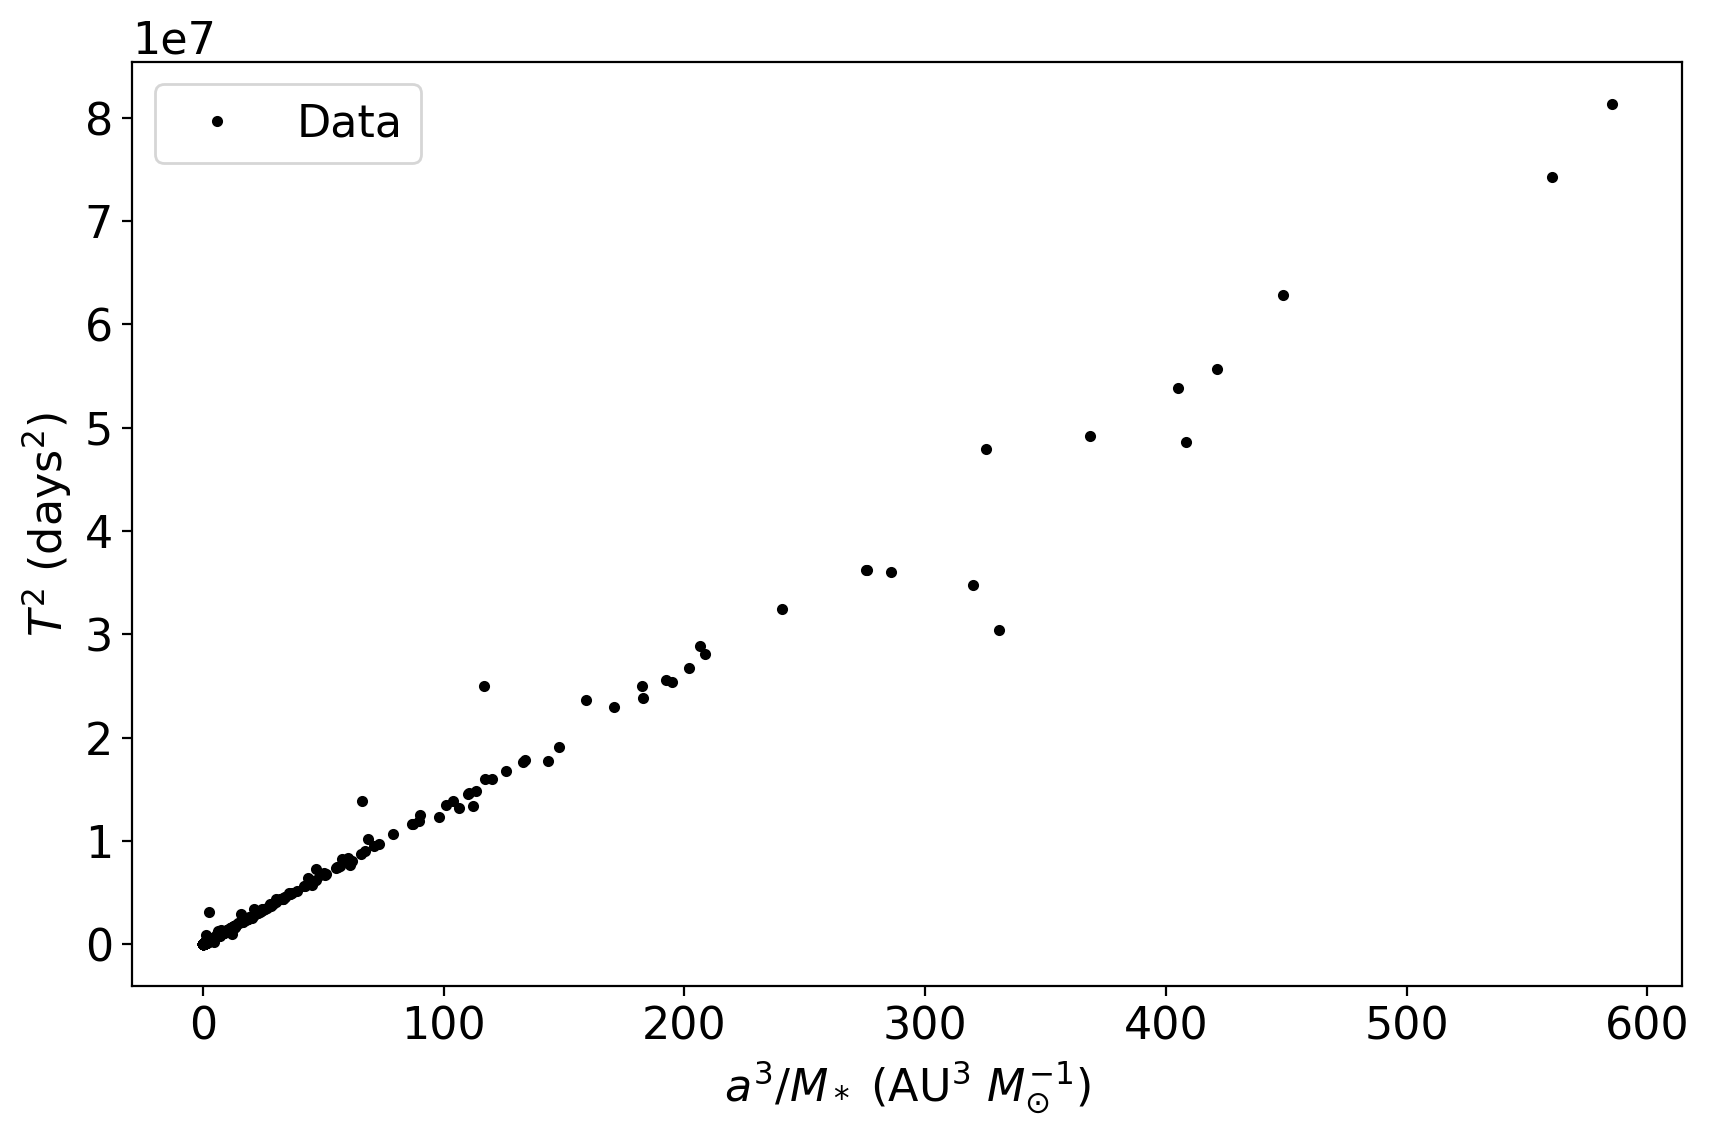

In [75]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (days$^2$)')
ax.set_xlabel('$a^3 / M_*$ (AU$^3$ $M_{\odot}^{-1}$)')
ax.legend()
plt.show()

This looks kind of how we would expect. But the units are horrible and we still need to do a least-squares fit. Let's add some new columns to the dataframe with sensible units. We'll need to convert the semi-major axis to m, the masses to kg and the periods to seconds. We could probably just convert the new columns we've just made, but doing this step by step will save your sanity in the long run.

The conversions we need are:

- 1 AU = $1.496 \times 10^{11}$ m
- 1 $M_\odot = 1.989 \times 10^{30}$ kg
- 1 d = ..... s (this is an exercise for the reader)

(ex-unit-conversion)=
```{admonition} Exercise: Convert to sensible units
:class: practice

Create three new columns for `orbital_period_sec`, `a_metres` and `mass_kg`. Use these columns to recalculate the `T_sq` and `a_3_m` columns. Replot these new columns, updating your figure to have the correct units on the axis labels.

[solution](soln_unit_conversion.ipynb)
```

In [76]:
kepler_df['orbital_period_sec'] = kepler_df['orbital_period'] * 24. * 60. * 60.
kepler_df['a_metres'] = kepler_df['semi_major_axis'] * 1.496E11
kepler_df['mass_kg'] = kepler_df['star_mass'] * 1.989E30

kepler_df['a_3_m'] = kepler_df['a_metres']**3 / kepler_df['mass_kg']
kepler_df['T_sq'] = kepler_df['orbital_period_sec']**2

In [77]:
kepler_df.to_csv('temp_kepler_2.csv', header=True, index=False)

If everything worked correctly you should end up with a figure that looks something like this:

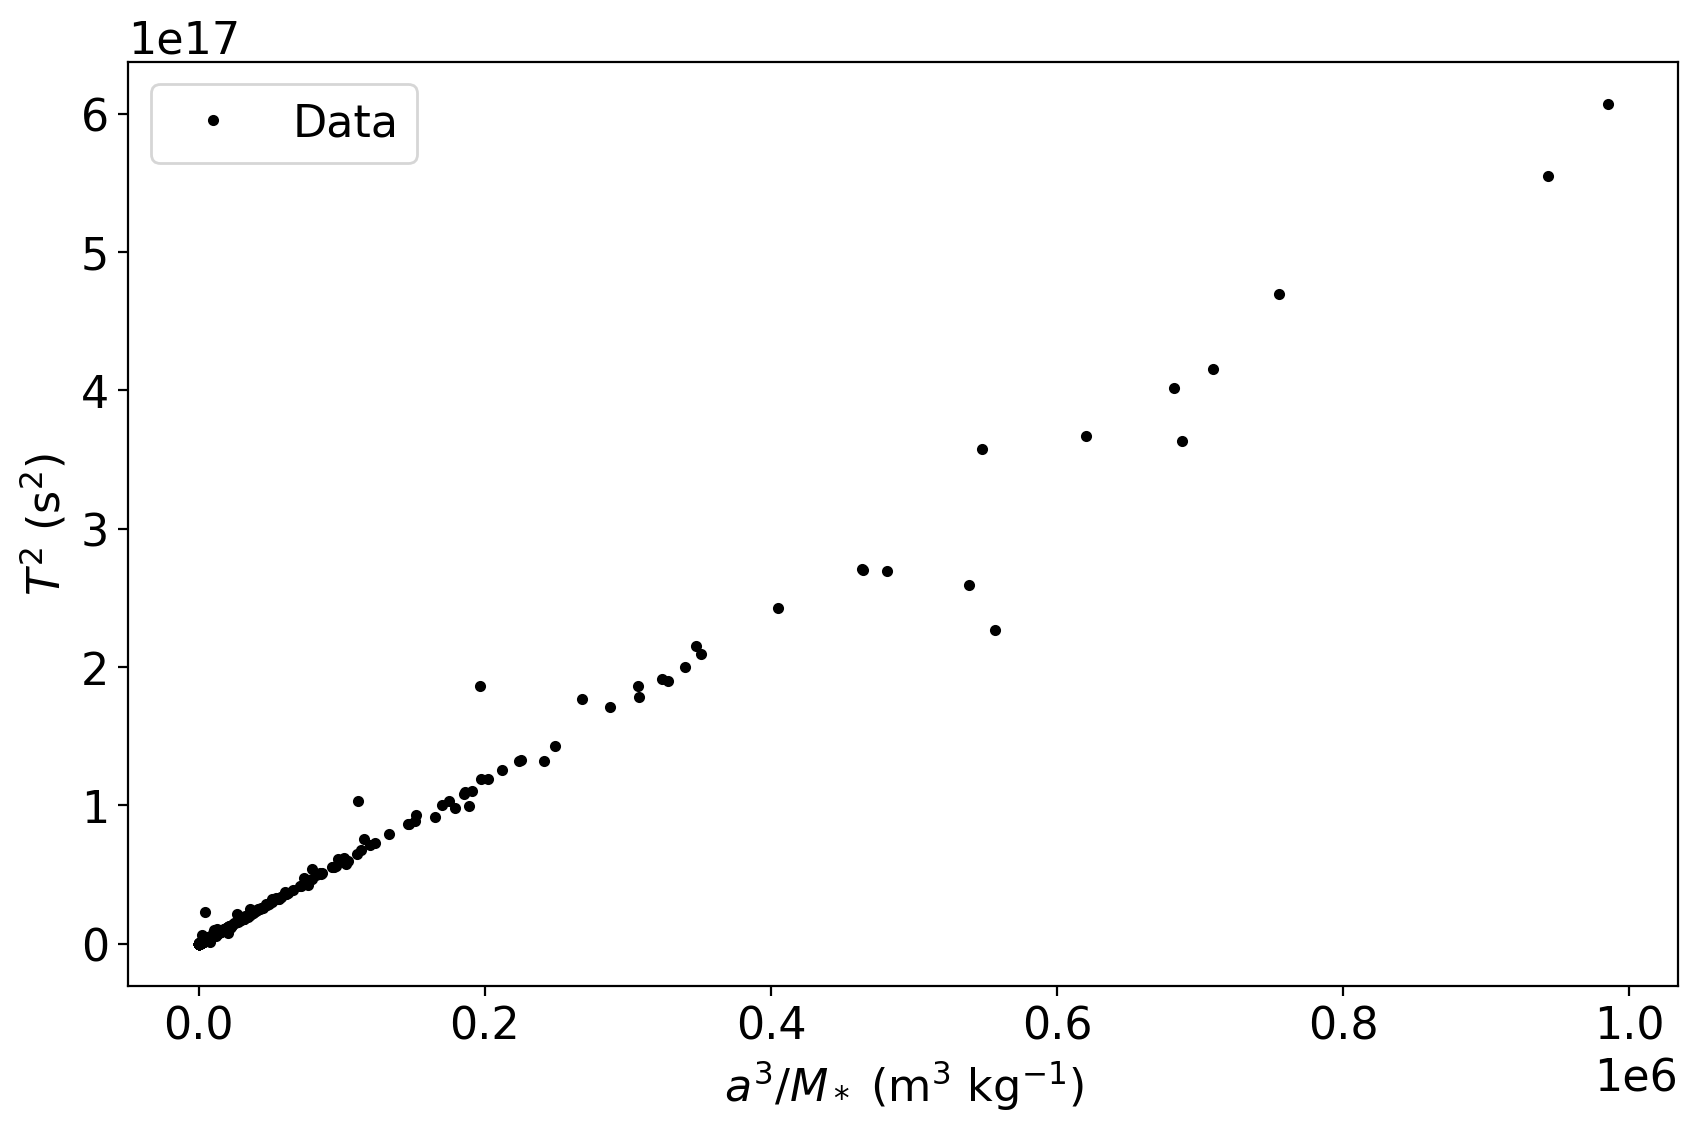

In [78]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m'], kepler_df['T_sq'], 'k.',ls='None', label='Data')
ax.set_ylabel('$T^2$ (s$^2$)')
ax.set_xlabel('$a^3 / M_*$ (m$^3$ kg$^{-1}$)')
ax.legend()
plt.show()

The last thing to do is the least-squares fit to estimate $G$. 

(ex-estimate-g)=
```{admonition} Exercise: Estimate $G \pm \sigma_G$
:class: practice

Use `curve_fit` to find an estimate of $G$ and its uncertainty. Add the best-fit line to your plot (and your legend). Add your value for $G \pm \sigma_G$ to the plot title. Tidy up your plot and write a caption in a markdown cell next to it. 

**Hint:** The first time you try this you might get a really weird answer for $G$. That's expected - you might need to give `curve_fit` a bit of help by giving it an initial guess for what the answer should be. Have a look at the `curve_fit` documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and see if there's a way to give it an initial guess.

[solution](soln_estimate_g.ipynb)
```

You should end up with something that looks like this:

In [79]:
def keplers_law(a_3_m, g):
    return (4.0 * np.pi**2  * a_3_m / g)

In [80]:
popt, pcov = curve_fit(keplers_law, (kepler_df['a_3_m']), (kepler_df['T_sq']), p0=1e-11)

g = popt[0] 
g_unc = np.sqrt(pcov[0][0])

print("G = {0:.3e} +/- {1:.3e}".format(g, g_unc))

G = 6.753e-11 +/- 1.591e-13


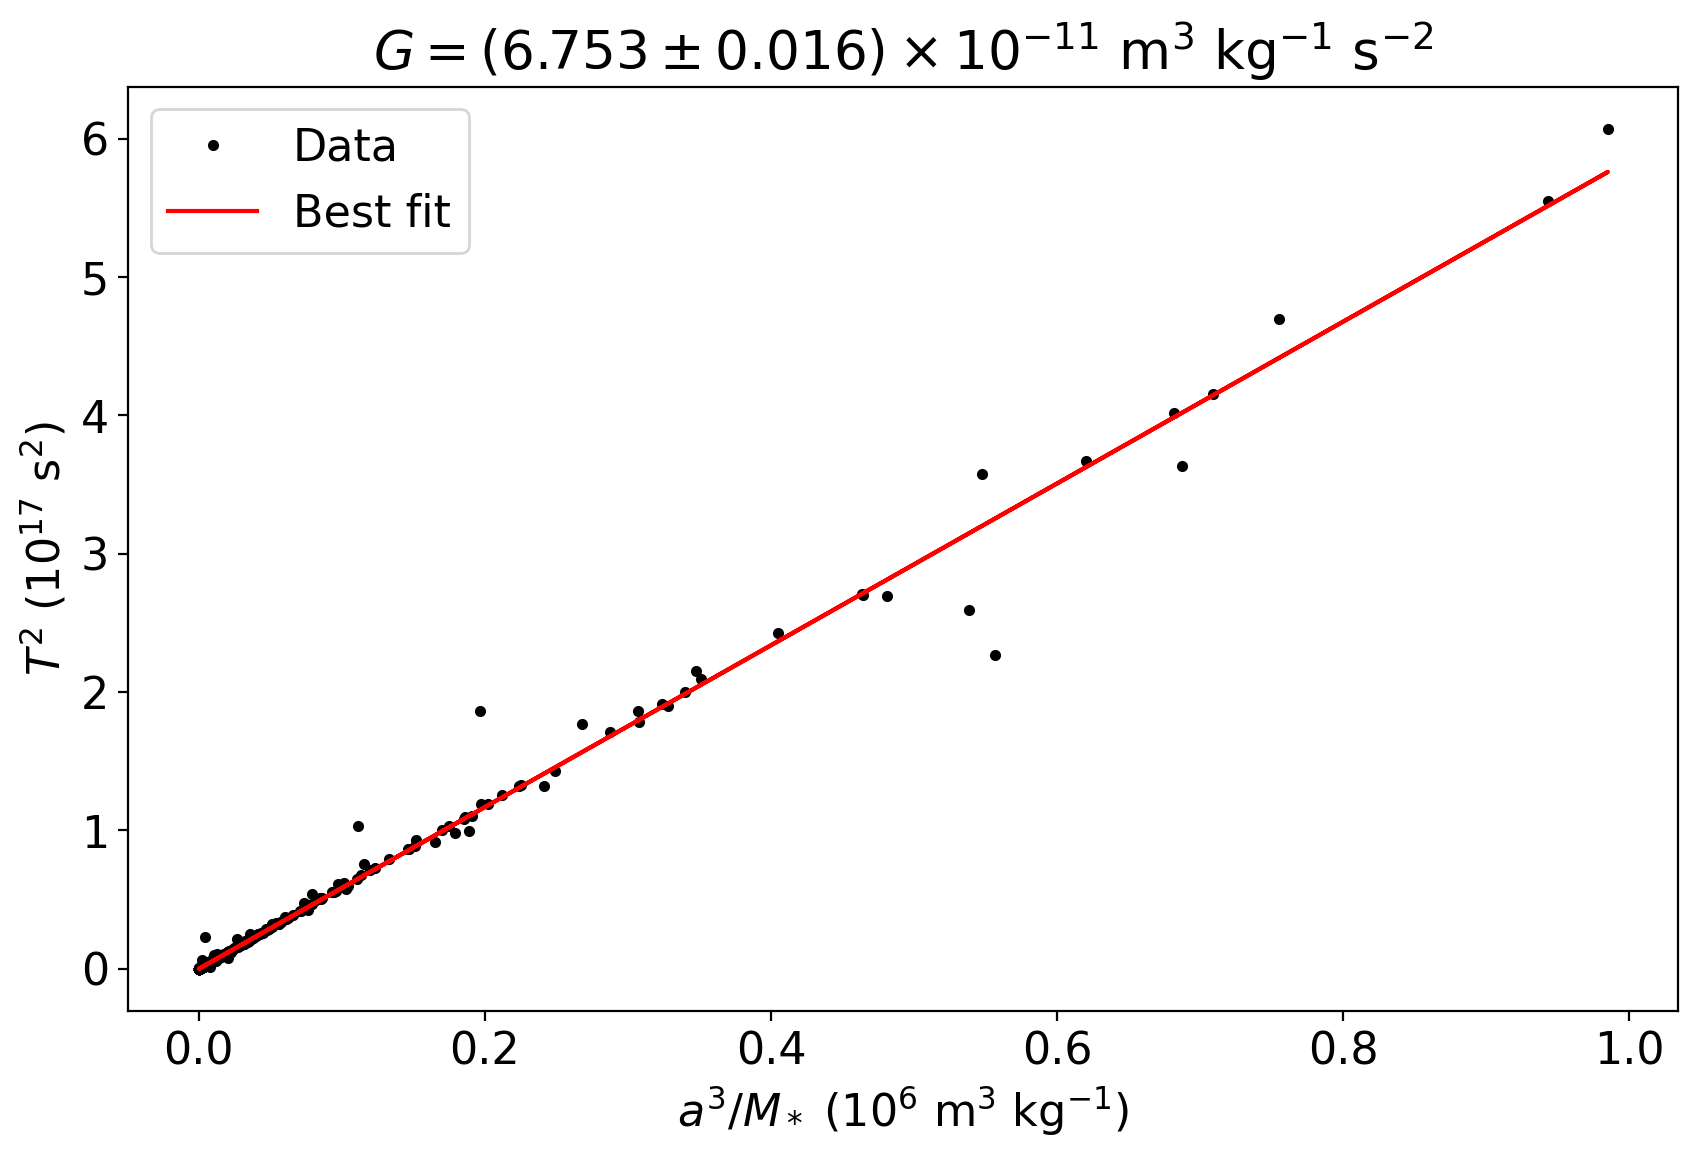

In [82]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(kepler_df['a_3_m']/1e6, kepler_df['T_sq'] / 1e17, 'k.',ls='None', label='Data')
ax.plot(kepler_df['a_3_m']/1e6, keplers_law(kepler_df['a_3_m'], g)/1e17, 'r-', label='Best fit')

ax.set_ylabel('$T^2$ ($10^{17}$ s$^2$)')
ax.set_xlabel('$a^3 / M_*$ ($10^6$ m$^3$ kg$^{-1}$)')

title_string = (r'$G = ({0:.3f} \pm {1:.3f}) \times 10^{{-11}}$ m$^{{3}}$ kg$^{{-1}}$ s$^{{-2}}$'.format((g / 1e-11), (g_unc / 1e-11)))
ax.set_title(title_string)
ax.legend()
plt.show();


## Key Points
- It's **essential** to look at your data once you've read it in!
- Check for missing data by looking for `nan` values
- Keep good notes on any steps you take in the markdown cells.